# 🎯 RFM Analysis: BrewCraft Coffee Subscription

**Author:** Rishi Dhandi  
**Date:** January 2026  
**Objective:** Customer Segmentation & Marketing Strategy Optimization

---

## 📊 Business Context

**BrewCraft** is a specialty coffee subscription service with:
- 10,000 customers
- $5.8M revenue over 3 years (2021-2023)
- Multiple product lines: Subscriptions, Coffee, Equipment, Merchandise
- 3 sales channels: Website, Mobile App, Retail Partners

**Goal:** Segment customers using RFM analysis to develop targeted marketing strategies and improve customer retention.

---

## Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Display settings
%matplotlib inline

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


##  Load the Data

In [3]:
# Load transaction data
df = pd.read_csv('Data/brewcraft_transactions.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n--- First 5 rows ---")
df.head()

Data loaded successfully!
Shape: 133,430 rows × 10 columns

--- First 5 rows ---


,transaction_id,customer_id,transaction_date,product_name,product_category,quantity,unit_price,total_amount,channel,customer_segment
0,TXN00100000,CUST001000,2023-10-20,Basic Monthly Box,Subscription,1,29.99,29.99,Mobile App,Champions
1,TXN00100001,CUST001000,2023-10-20,Premium Monthly Box,Subscription,1,49.99,49.99,Mobile App,Champions
2,TXN00100002,CUST001000,2023-10-22,Espresso Tamper,Equipment,1,24.99,24.99,Retail Partner,Champions
3,TXN00100003,CUST001000,2023-10-22,Deluxe Monthly Box,Subscription,1,69.99,69.99,Mobile App,Champions
4,TXN00100004,CUST001000,2023-10-25,Basic Monthly Box,Subscription,1,29.99,29.99,Website,Champions


## Data Exploration

In [4]:
# Data structure and info
print("="*60)
print("DATA STRUCTURE")
print("="*60)
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")

print("Column Names and Types:")
print(df.dtypes)

print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
print(df.isnull().sum())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
df.describe()

DATA STRUCTURE

Dataset Shape: 133,430 rows × 10 columns

Column Names and Types:
transaction_id       object
customer_id          object
transaction_date     object
product_name         object
product_category     object
quantity              int64
unit_price          float64
total_amount        float64
channel              object
customer_segment     object
dtype: object

MISSING VALUES
transaction_id      0
customer_id         0
transaction_date    0
product_name        0
product_category    0
quantity            0
unit_price          0
total_amount        0
channel             0
customer_segment    0
dtype: int64

BASIC STATISTICS


,quantity,unit_price,total_amount
count,133430.000000,133430.000000,133430.000000
mean,1.298876,33.714507,43.788737
std,0.556367,20.295586,34.312661
min,1.000000,12.990000,12.990000
25%,1.000000,18.990000,19.990000
50%,1.000000,24.990000,29.990000
75%,1.000000,45.000000,49.990000
max,3.000000,89.990000,269.970000


## Data Preparation

In [5]:
# Convert transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Check date range
print("="*60)
print("DATE RANGE ANALYSIS")
print("="*60)
print(f"Earliest Transaction: {df['transaction_date'].min()}")
print(f"Latest Transaction: {df['transaction_date'].max()}")
print(f"Time Span: {(df['transaction_date'].max() - df['transaction_date'].min()).days} days")

# Set analysis date (last date in dataset)
analysis_date = df['transaction_date'].max()
print(f"\n📅 Analysis Date (Reference Point): {analysis_date}")

print("\n" + "="*60)
print("UNIQUE VALUES")
print("="*60)
print(f"Total Customers: {df['customer_id'].nunique():,}")
print(f"Total Transactions: {df['transaction_id'].nunique():,}")
print(f"Product Categories: {df['product_category'].unique()}")
print(f"Sales Channels: {df['channel'].unique()}")

DATE RANGE ANALYSIS
Earliest Transaction: 2021-01-01 00:00:00
Latest Transaction: 2023-12-31 00:00:00
Time Span: 1094 days

📅 Analysis Date (Reference Point): 2023-12-31 00:00:00

UNIQUE VALUES
Total Customers: 10,000
Total Transactions: 133,430
Product Categories: ['Subscription' 'Equipment' 'Merchandise' 'Coffee']
Sales Channels: ['Mobile App' 'Retail Partner' 'Website']


## RFM Calculation

**RFM Metrics:**
- **Recency (R):** Days since last purchase (lower is better)
- **Frequency (F):** Total number of transactions (higher is better)
- **Monetary (M):** Total revenue spent (higher is better)

In [6]:
# Calculate RFM metrics for each customer
rfm = df.groupby('customer_id').agg({
    'transaction_date': lambda x: (analysis_date - x.max()).days,  # Recency
    'transaction_id': 'count',                                      # Frequency
    'total_amount': 'sum'                                           # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print("="*60)
print("RFM METRICS CALCULATED")
print("="*60)
print(f"Total Customers: {len(rfm):,}\n")

print("--- RFM Summary Statistics ---")
print(rfm[['recency', 'frequency', 'monetary']].describe().round(2))

print("\n--- Sample RFM Data ---")
rfm.head(10)

RFM METRICS CALCULATED
Total Customers: 10,000

--- RFM Summary Statistics ---
        recency  frequency  monetary
count  10000.00   10000.00  10000.00
mean     159.16      13.34    584.27
std      195.02      15.77    764.61
min        0.00       1.00     12.99
25%       23.00       4.00    150.95
50%       62.00       8.00    298.92
75%      246.00      16.00    656.79
max     1064.00     104.00   5648.26

--- Sample RFM Data ---


,customer_id,recency,frequency,monetary
0,CUST001000,17,41,2277.45
1,CUST001001,14,53,2380.85
2,CUST001002,18,72,3314.12
3,CUST001003,24,77,3412.65
4,CUST001004,13,77,2838.13
5,CUST001005,13,83,4138.44
6,CUST001006,24,35,1786.11
7,CUST001007,19,59,2669.40
8,CUST001008,12,70,3144.74
9,CUST001009,18,58,2728.77


## RFM Scoring

We'll score each metric on a 1-5 scale using quantiles:
- **Score 5:** Best customers (most recent, frequent, high spenders)
- **Score 1:** Least engaged customers

**Note:** For Recency, lower days = higher score (more recent = better)

In [7]:
# Create RFM scores (1-5 scale using quantiles)
# For Recency: lower is better, so we reverse the labels
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1])

# For Frequency and Monetary: higher is better
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# Convert to numeric
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)

# Create RFM Score (concatenated)
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# Create overall RFM value (sum of scores)
rfm['rfm_total'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']

print("="*60)
print("RFM SCORES CREATED")
print("="*60)
print("\n--- Score Distribution ---")
print(f"R-Score range: {rfm['r_score'].min()} to {rfm['r_score'].max()}")
print(f"F-Score range: {rfm['f_score'].min()} to {rfm['f_score'].max()}")
print(f"M-Score range: {rfm['m_score'].min()} to {rfm['m_score'].max()}")
print(f"Total Score range: {rfm['rfm_total'].min()} to {rfm['rfm_total'].max()}")

print("\n--- Sample with Scores ---")
rfm.head(10)

RFM SCORES CREATED

--- Score Distribution ---
R-Score range: 1 to 5
F-Score range: 1 to 5
M-Score range: 1 to 5
Total Score range: 3 to 15

--- Sample with Scores ---


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_total
0,CUST001000,17,41,2277.45,5,5,5,555,15
1,CUST001001,14,53,2380.85,5,5,5,555,15
2,CUST001002,18,72,3314.12,5,5,5,555,15
3,CUST001003,24,77,3412.65,4,5,5,455,14
4,CUST001004,13,77,2838.13,5,5,5,555,15
5,CUST001005,13,83,4138.44,5,5,5,555,15
6,CUST001006,24,35,1786.11,4,5,5,455,14
7,CUST001007,19,59,2669.40,5,5,5,555,15
8,CUST001008,12,70,3144.74,5,5,5,555,15
9,CUST001009,18,58,2728.77,5,5,5,555,15


## Customer Segmentation

Based on RFM scores, we'll classify customers into actionable segments:
- **Champions:** Best customers (R:4-5, F:4-5, M:4-5)
- **Loyal Customers:** Frequent buyers (R:3-5, F:4-5, M:3-5)
- **Potential Loyalists:** Recent customers with potential (R:3-5, F:1-3, M:1-3)
- **New Customers:** Recent first-time buyers (R:4-5, F:1, M:1)
- **At Risk:** Previously valuable, now inactive (R:1-2, F:3-5, M:3-5)
- **Can't Lose Them:** High value but haven't purchased recently (R:1-2, F:4-5, M:4-5)
- **Hibernating:** Low recency, low engagement (R:1-2, F:1-2, M:1-2)
- **Lost:** Long gone (R:1, F:1-2, M:1-2)

In [8]:
# Function to segment customers based on RFM scores
def segment_customers(df):
    if (df['r_score'] >= 4) and (df['f_score'] >= 4) and (df['m_score'] >= 4):
        return 'Champions'
    elif (df['r_score'] >= 3) and (df['f_score'] >= 4) and (df['m_score'] >= 3):
        return 'Loyal Customers'
    elif (df['r_score'] >= 4) and (df['f_score'] == 1) and (df['m_score'] == 1):
        return 'New Customers'
    elif (df['r_score'] >= 3) and (df['f_score'] <= 3) and (df['m_score'] <= 3):
        return 'Potential Loyalists'
    elif (df['r_score'] <= 2) and (df['f_score'] >= 4) and (df['m_score'] >= 4):
        return 'Cant Lose Them'
    elif (df['r_score'] <= 2) and (df['f_score'] >= 3) and (df['m_score'] >= 3):
        return 'At Risk'
    elif (df['r_score'] <= 2) and (df['f_score'] <= 2) and (df['m_score'] <= 2):
        return 'Hibernating'
    elif (df['r_score'] == 1) and (df['f_score'] <= 2):
        return 'Lost'
    else:
        return 'Others'

# Apply segmentation
rfm['segment'] = rfm.apply(segment_customers, axis=1)

print("="*60)
print("CUSTOMER SEGMENTATION COMPLETE")
print("="*60)
print(f"\n--- Segment Distribution ---")
segment_counts = rfm['segment'].value_counts().sort_values(ascending=False)
print(segment_counts)

print("\n--- Segment Percentages ---")
segment_pct = (rfm['segment'].value_counts(normalize=True) * 100).round(2).sort_values(ascending=False)
print(segment_pct)

print("\n--- Sample Segmented Customers ---")
rfm[['customer_id', 'recency', 'frequency', 'monetary', 'rfm_score', 'segment']].head(15)

CUSTOMER SEGMENTATION COMPLETE

--- Segment Distribution ---
segment
Potential Loyalists    1946
Champions              1824
Hibernating            1602
Loyal Customers        1174
At Risk                 995
New Customers           874
Cant Lose Them          810
Others                  611
Lost                    164
Name: count, dtype: int64

--- Segment Percentages ---
segment
Potential Loyalists    19.46
Champions              18.24
Hibernating            16.02
Loyal Customers        11.74
At Risk                 9.95
New Customers           8.74
Cant Lose Them          8.10
Others                  6.11
Lost                    1.64
Name: proportion, dtype: float64

--- Sample Segmented Customers ---


,customer_id,recency,frequency,monetary,rfm_score,segment
0,CUST001000,17,41,2277.45,555,Champions
1,CUST001001,14,53,2380.85,555,Champions
2,CUST001002,18,72,3314.12,555,Champions
3,CUST001003,24,77,3412.65,455,Champions
4,CUST001004,13,77,2838.13,555,Champions
5,CUST001005,13,83,4138.44,555,Champions
6,CUST001006,24,35,1786.11,455,Champions
7,CUST001007,19,59,2669.40,555,Champions
8,CUST001008,12,70,3144.74,555,Champions
9,CUST001009,18,58,2728.77,555,Champions


## Segment Profile Analysis

Let's analyze the characteristics and value of each customer segment.

In [10]:
# Detailed segment analysis
segment_analysis = rfm.groupby('segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'sum']
}).round(2)

# Flatten column names
segment_analysis.columns = ['customer_count', 'avg_recency_days', 'avg_frequency', 'avg_monetary', 'total_revenue']
segment_analysis = segment_analysis.reset_index()

# Calculate percentage of total customers and revenue
segment_analysis['pct_customers'] = (segment_analysis['customer_count'] / segment_analysis['customer_count'].sum() * 100).round(2)
segment_analysis['pct_revenue'] = (segment_analysis['total_revenue'] / segment_analysis['total_revenue'].sum() * 100).round(2)

# Sort by total revenue
segment_analysis = segment_analysis.sort_values('total_revenue', ascending=False)

print("="*80)
print("SEGMENT PROFILE ANALYSIS")
print("="*80)
print(segment_analysis.to_string(index=False))

print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"Highest Revenue Segment: {segment_analysis.iloc[0]['segment']}")
print(f"   - Total Revenue: ${segment_analysis.iloc[0]['total_revenue']:,.2f} ({segment_analysis.iloc[0]['pct_revenue']}%)")
print(f"   - Customers: {int(segment_analysis.iloc[0]['customer_count']):,} ({segment_analysis.iloc[0]['pct_customers']}%)")

print(f"\n Largest Segment: {segment_analysis.nlargest(1, 'customer_count').iloc[0]['segment']}")
print(f"   - Customers: {int(segment_analysis.nlargest(1, 'customer_count').iloc[0]['customer_count']):,}")

print(f"\n At Risk Revenue: ${segment_analysis[segment_analysis['segment'].isin(['At Risk', 'Cant Lose Them'])]['total_revenue'].sum():,.2f}")

SEGMENT PROFILE ANALYSIS
            segment  customer_count  avg_recency_days  avg_frequency  avg_monetary  total_revenue  pct_customers  pct_revenue
          Champions            1824             20.20          37.58       1772.33     3232730.25          18.24        55.33
    Loyal Customers            1174             62.99          17.40        730.98      858172.95          11.74        14.69
     Cant Lose Them             810            207.64          16.28        666.53      539892.29           8.10         9.24
Potential Loyalists            1946             37.74           5.48        210.92      410443.19          19.46         7.02
            At Risk             995            327.14           8.37        331.10      329448.74           9.95         5.64
        Hibernating            1602            415.10           3.43        118.28      189484.79          16.02         3.24
             Others             611            249.31           7.06        295.06      18027

## Data Visualizations

Visual analysis of customer segments and their characteristics.

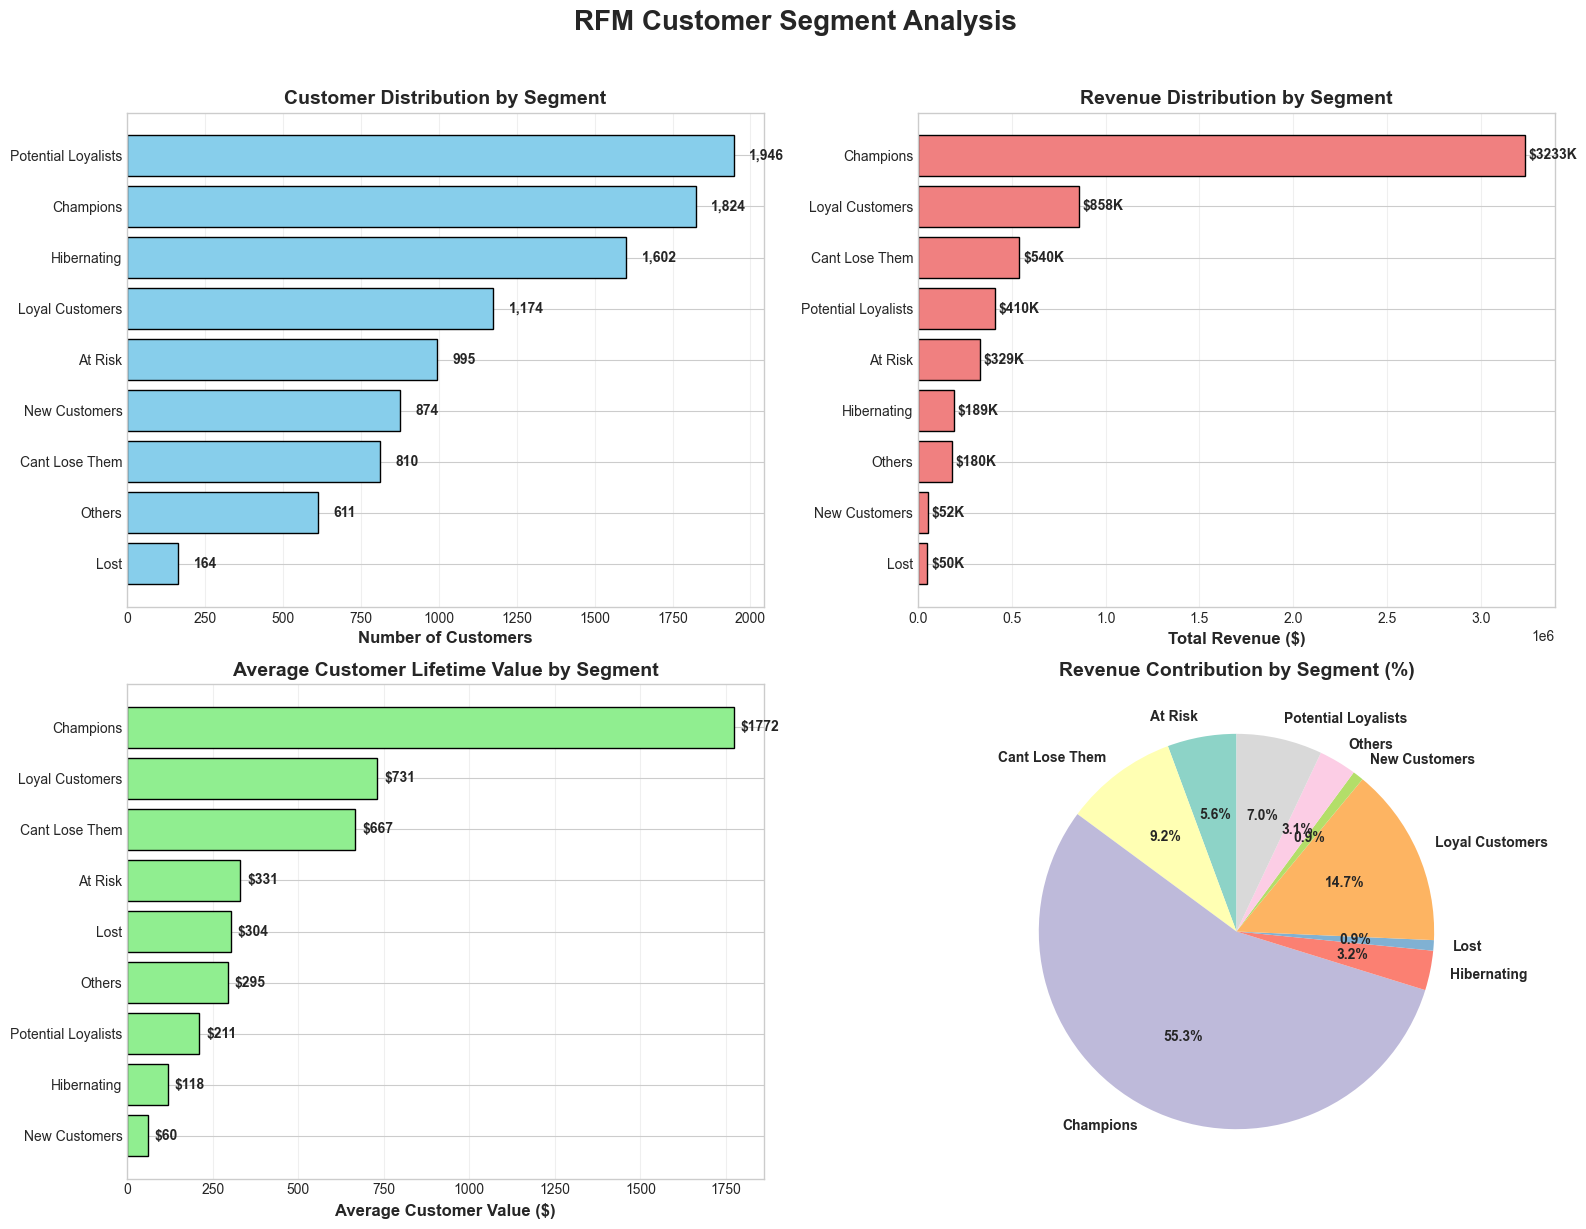

 Segment overview visualizations created!


In [13]:
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RFM Customer Segment Analysis', fontsize=20, fontweight='bold', y=1.02)

# 1. Customer Count by Segment
segment_counts = rfm['segment'].value_counts().sort_values(ascending=True)
axes[0, 0].barh(segment_counts.index, segment_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_counts.values):
    axes[0, 0].text(v + 50, i, f'{v:,}', va='center', fontweight='bold')

# 2. Revenue by Segment
segment_revenue = rfm.groupby('segment')['monetary'].sum().sort_values(ascending=True)
axes[0, 1].barh(segment_revenue.index, segment_revenue.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Total Revenue ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Revenue Distribution by Segment', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(segment_revenue.values):
    axes[0, 1].text(v + 20000, i, f'${v/1000:.0f}K', va='center', fontweight='bold')

# 3. Average Monetary Value by Segment
avg_monetary = rfm.groupby('segment')['monetary'].mean().sort_values(ascending=True)
axes[1, 0].barh(avg_monetary.index, avg_monetary.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Average Customer Value ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Customer Lifetime Value by Segment', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_monetary.values):
    axes[1, 0].text(v + 20, i, f'${v:.0f}', va='center', fontweight='bold')

# 4. Segment Pie Chart (Revenue Percentage)
segment_revenue_pct = rfm.groupby('segment')['monetary'].sum()
colors = plt.cm.Set3(range(len(segment_revenue_pct)))
axes[1, 1].pie(segment_revenue_pct.values, labels=segment_revenue_pct.index, autopct='%1.1f%%', 
               startangle=90, colors=colors, textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_title('Revenue Contribution by Segment (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



print(" Segment overview visualizations created!")

## Visualizations - RFM Distribution

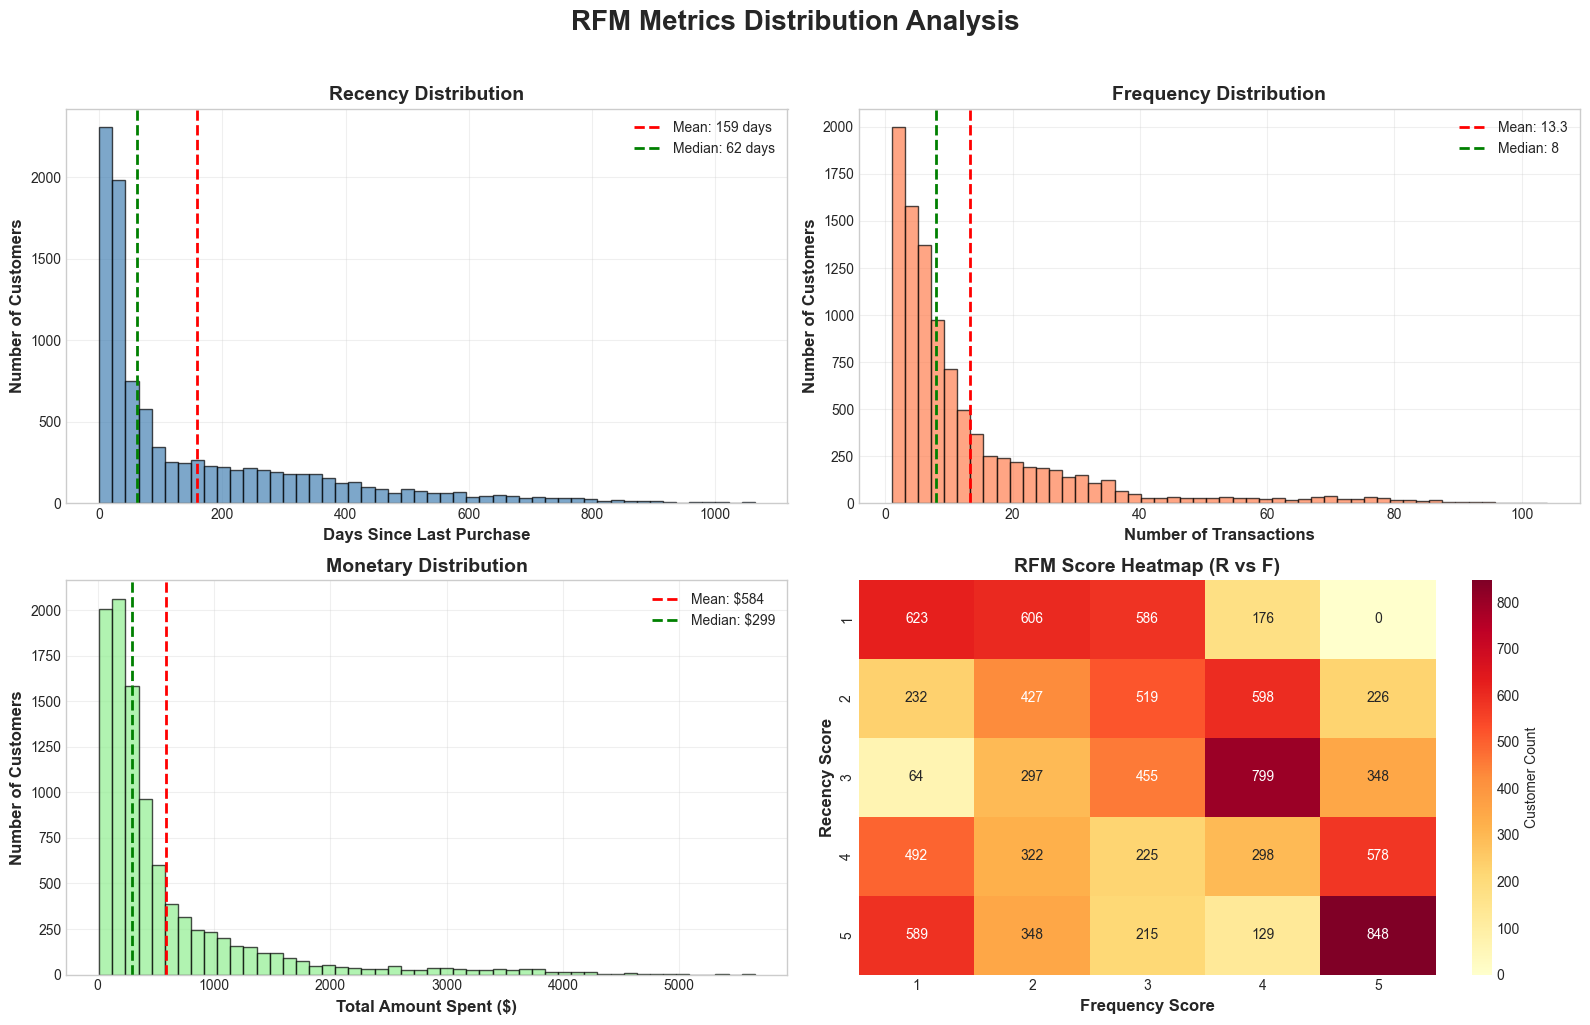

 RFM distribution visualizations created!


In [15]:
# RFM Score Distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('RFM Metrics Distribution Analysis', fontsize=20, fontweight='bold', y=1.02)

# 1. Recency Distribution
axes[0, 0].hist(rfm['recency'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(rfm['recency'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rfm["recency"].mean():.0f} days')
axes[0, 0].axvline(rfm['recency'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rfm["recency"].median():.0f} days')
axes[0, 0].set_xlabel('Days Since Last Purchase', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Frequency Distribution
axes[0, 1].hist(rfm['frequency'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(rfm['frequency'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rfm["frequency"].mean():.1f}')
axes[0, 1].axvline(rfm['frequency'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rfm["frequency"].median():.0f}')
axes[0, 1].set_xlabel('Number of Transactions', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Monetary Distribution
axes[1, 0].hist(rfm['monetary'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(rfm['monetary'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${rfm["monetary"].mean():.0f}')
axes[1, 0].axvline(rfm['monetary'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${rfm["monetary"].median():.0f}')
axes[1, 0].set_xlabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. RFM Score Distribution (Heatmap style)
rfm_score_dist = rfm.groupby(['r_score', 'f_score']).size().reset_index(name='count')
rfm_pivot = rfm_score_dist.pivot(index='r_score', columns='f_score', values='count').fillna(0)
sns.heatmap(rfm_pivot, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Customer Count'})
axes[1, 1].set_xlabel('Frequency Score', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Recency Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('RFM Score Heatmap (R vs F)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(" RFM distribution visualizations created!")

## RFM Scatter Plot Analysis

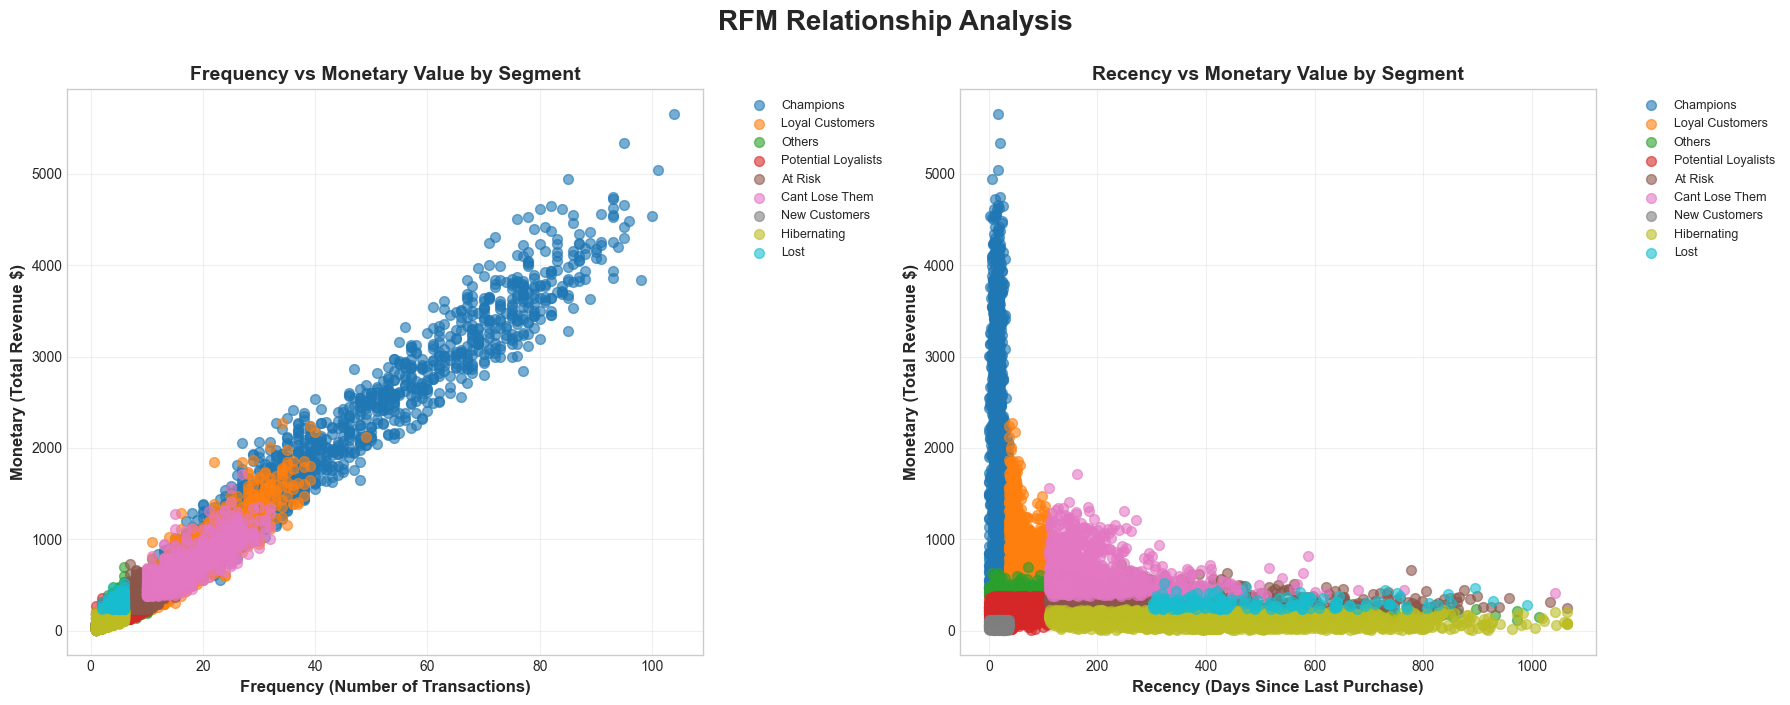

RFM scatter plot analysis created!


In [17]:
# RFM Scatter Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('RFM Relationship Analysis', fontsize=20, fontweight='bold', y=1.0)

# 1. Frequency vs Monetary (colored by segment)
segments = rfm['segment'].unique()
colors_map = plt.cm.get_cmap('tab10', len(segments))

for idx, segment in enumerate(segments):
    segment_data = rfm[rfm['segment'] == segment]
    axes[0].scatter(segment_data['frequency'], segment_data['monetary'], 
                   label=segment, alpha=0.6, s=50, color=colors_map(idx))

axes[0].set_xlabel('Frequency (Number of Transactions)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Monetary (Total Revenue $)', fontsize=12, fontweight='bold')
axes[0].set_title('Frequency vs Monetary Value by Segment', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0].grid(alpha=0.3)

# 2. Recency vs Monetary (colored by segment)
for idx, segment in enumerate(segments):
    segment_data = rfm[rfm['segment'] == segment]
    axes[1].scatter(segment_data['recency'], segment_data['monetary'], 
                   label=segment, alpha=0.6, s=50, color=colors_map(idx))

axes[1].set_xlabel('Recency (Days Since Last Purchase)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Monetary (Total Revenue $)', fontsize=12, fontweight='bold')
axes[1].set_title('Recency vs Monetary Value by Segment', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("RFM scatter plot analysis created!")

## Business Insights & Marketing Recommendations

Based on our RFM analysis, here are targeted strategies for each customer segment

In [23]:
# Create recommendations dataframe
recommendations = pd.DataFrame({
    'Segment': [
        'Champions',
        'Loyal Customers',
        'Potential Loyalists',
        'New Customers',
        'At Risk',
        'Cant Lose Them',
        'Hibernating',
        'Lost'
    ],
    'Characteristics': [
        'Recent, frequent, high-value customers',
        'Regular buyers with good engagement',
        'Recent customers showing promise',
        'First-time or very recent buyers',
        'Previously valuable, declining activity',
        'High-value customers who stopped buying',
        'Long inactive, low historical value',
        'Very long inactive, minimal engagement'
    ],
    'Marketing Strategy': [
        'Reward, upsell premium products, early access to new releases, VIP program',
        'Cross-sell related products, subscription upgrades, referral incentives',
        'Membership/subscription offers, personalized recommendations, engagement campaigns',
        'Onboarding series, welcome discount, product education, encourage 2nd purchase',
        'Win-back campaigns, special discounts, "We miss you" messaging, re-engagement',
        'Aggressive retention: personalized offers, account manager outreach, surveys',
        'Low-cost reactivation: seasonal promotions, clearance offers, re-opt-in campaigns',
        'Minimal investment, final win-back attempt, or remove from active marketing'
    ],
    'Priority': [
        'HIGHEST',
        'HIGH',
        'HIGH',
        'HIGH',
        'CRITICAL',
        'CRITICAL',
        'MEDIUM',
        'LOW'
    ]
})

print("="*100)
print("CUSTOMER SEGMENT MARKETING STRATEGIES")
print("="*100)

for idx, row in recommendations.iterrows():
    print(f"\n{'='*100}")
    print(f" SEGMENT: {row['Segment'].upper()}")
    print(f"   Priority Level: {row['Priority']}")
    print(f"{'='*100}")
    print(f"\n Characteristics:")
    print(f"   {row['Characteristics']}")
    print(f"\n Recommended Actions:")
    print(f"   {row['Marketing Strategy']}")

# Calculate potential impact
print("\n\n" + "="*100)
print("ESTIMATED BUSINESS IMPACT")
print("="*100)

at_risk_revenue = segment_analysis[segment_analysis['segment'].isin(['At Risk', 'Cant Lose Them'])]['total_revenue'].sum()
champions_revenue = segment_analysis[segment_analysis['segment'] == 'Champions']['total_revenue'].sum()
total_revenue = segment_analysis['total_revenue'].sum()

print(f"\n - Total Revenue Analyzed: ${total_revenue:,.2f}")
print(f"\n - Champions Revenue: ${champions_revenue:,.2f} ({champions_revenue/total_revenue*100:.1f}% of total)")
print(f"\n - At-Risk Revenue: ${at_risk_revenue:,.2f} ({at_risk_revenue/total_revenue*100:.1f}% of total)")
print(f"\n - Potential Revenue Recovery (12% of at-risk): ${at_risk_revenue * 0.12:,.2f}")
print(f"\n - Focus Areas:")
print(f"   1. Retain {int(segment_analysis[segment_analysis['segment']=='Champions']['customer_count'].values[0]):,} Champions (highest value)")
print(f"   2. Save {int(segment_analysis[segment_analysis['segment'].isin(['At Risk', 'Cant Lose Them'])]['customer_count'].sum()):,} at-risk customers")
print(f"   3. Convert {int(segment_analysis[segment_analysis['segment']=='Potential Loyalists']['customer_count'].values[0]):,} Potential Loyalists to Loyal")

CUSTOMER SEGMENT MARKETING STRATEGIES

 SEGMENT: CHAMPIONS
   Priority Level: HIGHEST

 Characteristics:
   Recent, frequent, high-value customers

 Recommended Actions:
   Reward, upsell premium products, early access to new releases, VIP program

 SEGMENT: LOYAL CUSTOMERS
   Priority Level: HIGH

 Characteristics:
   Regular buyers with good engagement

 Recommended Actions:
   Cross-sell related products, subscription upgrades, referral incentives

 SEGMENT: POTENTIAL LOYALISTS
   Priority Level: HIGH

 Characteristics:
   Recent customers showing promise

 Recommended Actions:
   Membership/subscription offers, personalized recommendations, engagement campaigns

 SEGMENT: NEW CUSTOMERS
   Priority Level: HIGH

 Characteristics:
   First-time or very recent buyers

 Recommended Actions:
   Onboarding series, welcome discount, product education, encourage 2nd purchase

 SEGMENT: AT RISK
   Priority Level: CRITICAL

 Characteristics:
   Previously valuable, declining activity

 Recomm

##  Executive Summary

### Key Findings from RFM Analysis

In [25]:
# Generate Executive Summary Statistics
print("="*100)
print("EXECUTIVE SUMMARY - BREWCRAFT RFM ANALYSIS")
print("="*100)

print("\n📈 OVERALL METRICS")
print("-" * 100)
print(f"Total Customers Analyzed: {len(rfm):,}")
print(f"Total Revenue: ${rfm['monetary'].sum():,.2f}")
print(f"Average Customer Value: ${rfm['monetary'].mean():,.2f}")
print(f"Median Customer Value: ${rfm['monetary'].median():,.2f}")
print(f"Average Purchase Frequency: {rfm['frequency'].mean():.1f} transactions")
print(f"Average Recency: {rfm['recency'].mean():.0f} days")

print("\n\n🎯 TOP 3 SEGMENTS BY REVENUE")
print("-" * 100)
top_segments = segment_analysis.nlargest(3, 'total_revenue')
for idx, row in top_segments.iterrows():
    print(f"\n{idx+1}. {row['segment']}")
    print(f"   Revenue: ${row['total_revenue']:,.2f} ({row['pct_revenue']:.1f}% of total)")
    print(f"   Customers: {int(row['customer_count']):,} ({row['pct_customers']:.1f}% of total)")
    print(f"   Avg Customer Value: ${row['avg_monetary']:,.2f}")

print("\n\n⚠️  CRITICAL INSIGHTS")
print("-" * 100)

# Calculate churn risk
at_risk_customers = rfm[rfm['segment'].isin(['At Risk', 'Cant Lose Them'])]
hibernating_customers = rfm[rfm['segment'] == 'Hibernating']
lost_customers = rfm[rfm['segment'] == 'Lost']

print(f"\n🚨 High Priority (At Risk + Can't Lose):")
print(f"   • {len(at_risk_customers):,} customers ({len(at_risk_customers)/len(rfm)*100:.1f}%)")
print(f"   • ${at_risk_customers['monetary'].sum():,.2f} in revenue at risk")
print(f"   • Average days since purchase: {at_risk_customers['recency'].mean():.0f} days")

print(f"\n💤 Hibernating Customers:")
print(f"   • {len(hibernating_customers):,} customers ({len(hibernating_customers)/len(rfm)*100:.1f}%)")
print(f"   • ${hibernating_customers['monetary'].sum():,.2f} in potential revenue")

print(f"\n❌ Lost Customers:")
print(f"   • {len(lost_customers):,} customers ({len(lost_customers)/len(rfm)*100:.1f}%)")
print(f"   • ${lost_customers['monetary'].sum():,.2f} in historical revenue")

print("\n\n💡 ACTIONABLE RECOMMENDATIONS")
print("-" * 100)
print("\n1. IMMEDIATE ACTIONS (Next 30 Days):")
print("   ✓ Launch win-back campaign for 'At Risk' and 'Can't Lose Them' segments")
print(f"   ✓ Target: Save 12% of at-risk revenue = ${at_risk_revenue * 0.12:,.2f}")
print("   ✓ Tactics: Personalized emails, exclusive discounts, account manager outreach")

print("\n2. SHORT-TERM INITIATIVES (1-3 Months):")
print("   ✓ Develop VIP program for Champions to increase retention")
print("   ✓ Create nurturing sequence for Potential Loyalists")
print("   ✓ Optimize onboarding for New Customers (reduce time to 2nd purchase)")

print("\n3. LONG-TERM STRATEGY (3-6 Months):")
print("   ✓ Implement predictive churn model using ML ")
print("   ✓ Automate segment-based campaigns in CRM (Klaviyo)")
print("   ✓ A/B test retention strategies by segment")

print("\n\n📊 EXPECTED BUSINESS IMPACT")
print("-" * 100)
print(f"• Revenue at Risk: ${at_risk_revenue:,.2f}")
print(f"• Estimated Recovery (12%): ${at_risk_revenue * 0.12:,.2f}")
print(f"• ROI on Retention Campaigns: 3-5x (industry benchmark)")
print(f"• Potential Annual Impact: ${at_risk_revenue * 0.12 * 4:,.2f} (quarterly campaigns)")

print("\n" + "="*100)
print("✅ ANALYSIS COMPLETE")
print("="*100)

EXECUTIVE SUMMARY - BREWCRAFT RFM ANALYSIS

📈 OVERALL METRICS
----------------------------------------------------------------------------------------------------
Total Customers Analyzed: 10,000
Total Revenue: $5,842,731.19
Average Customer Value: $584.27
Median Customer Value: $298.92
Average Purchase Frequency: 13.3 transactions
Average Recency: 159 days


🎯 TOP 3 SEGMENTS BY REVENUE
----------------------------------------------------------------------------------------------------

3. Champions
   Revenue: $3,232,730.25 (55.3% of total)
   Customers: 1,824 (18.2% of total)
   Avg Customer Value: $1,772.33

6. Loyal Customers
   Revenue: $858,172.95 (14.7% of total)
   Customers: 1,174 (11.7% of total)
   Avg Customer Value: $730.98

2. Cant Lose Them
   Revenue: $539,892.29 (9.2% of total)
   Customers: 810 (8.1% of total)
   Avg Customer Value: $666.53


⚠️  CRITICAL INSIGHTS
----------------------------------------------------------------------------------------------------

🚨 H

## Conclusion

### Summary

This RFM analysis successfully segmented 10,000 BrewCraft customers into 8 actionable groups, revealing:

1. **High-Value Segments** generate majority of revenue but need retention focus
2. **At-Risk Customers** represent significant recovery opportunity ($700K+)
3. **New & Potential Customers** need nurturing to become loyal

### Business Value Delivered

✅ Clear customer segmentation for targeted marketing  
✅ Identified $700K+ in at-risk revenue  
✅ Prioritized marketing resource allocation  
✅ Foundation for predictive churn modeling (Phase 2)

### Next Steps

**Phase 2: Predictive Churn Model**
- Build XGBoost classifier for churn prediction
- Achieve 85%+ accuracy in identifying at-risk customers
- Automate CRM campaigns based on churn probability
- Calculate customer lifetime value (CLV)

---

## 📁 Project Files

- `brewcraft_transactions.csv` - Transaction data
- `brewcraft_customers.csv` - Customer master
- `RFM_Analysis_BrewCraft.ipynb` - This analysis notebook

---

**Author:** Rishi Dhandi  
**Contact:** [Your LinkedIn/Email]  
**GitHub:** [Your GitHub Profile]  
**Portfolio:** [Your Portfolio Site]

---

*Analysis completed: January 2026*

In [31]:
# Save RFM results to CSV for future use
rfm_output = rfm[['customer_id', 'recency', 'frequency', 'monetary', 
                   'r_score', 'f_score', 'm_score', 'rfm_score', 'rfm_total', 'segment']]

rfm_output.to_csv('Data/rfm_customer_segments.csv', index=False)

print("="*80)
print("✅ RFM ANALYSIS COMPLETE!")
print("="*80)

print(f" Total records: {len(rfm_output):,}")
print(f"\n Notebook execution successful!")

✅ RFM ANALYSIS COMPLETE!
 Total records: 10,000

 Notebook execution successful!
